## Importar archivos de datos en local

In [1]:
#import pandas as pd

#ruta_archivo1 = '/Users/luciaprietogonzalez/Documents/Universidad/CURSO4/TFG/TFG DEFINITIVO/DESARROLLO/TFG/Tablas originales/Mental_Health_in_Tech_Survey.csv'  
#ruta_archivo2 = '/Users/luciaprietogonzalez/Documents/Universidad/CURSO4/TFG/TFG DEFINITIVO/DESARROLLO/TFG/Tablas originales/Student_Mental _health.csv'  

#importar el archivo csv y crear el DataFrame
#datos_tech_original = pd.read_csv(ruta_archivo1)
#datos_student_original = pd.read_csv(ruta_archivo2)


## INSTALAR LIBRERIAS NECESARIAS E IMPORTARLAS 

In [11]:
#instalar librerias necesarias
pip install pandas
pip install google-cloud-bigquery
pip install db-dtypes
pip install seaborn
pip install matplotlib


  Using cached pandas-1.3.5-cp37-cp37m-macosx_10_9_x86_64.whl (11.0 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 11.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


## Importar archivos de BigQuery (GCP)

In [2]:
def importar_tabla_bigquery (id_proyecto, tabla, name_dataframe): 

    client = bigquery.Client(project=id_proyecto)

    #consulta a la tabla
    query = f"SELECT * FROM `{tabla}`"

    #ejecutar la consulta
    dataframe = client.query(query).to_dataframe()

    #cambiar nombre al dataframe 
    globals()[name_dataframe] = dataframe


In [3]:
#COMPLETAR CON LOS DATOS DE LA TABLA QUE SE QUIERE IMPORTAR 
id_proyecto="tfg-ayudasaludmental-12345"
tabla_importar= "DatosTech.datos_iniciales_tech"
name_dataframe= "datos_tech_original"

importar_tabla_bigquery(id_proyecto,tabla_importar,name_dataframe)

## Analisis inicial del dataset

In [4]:
#analisis inicial de los datos 
#mostrar primeras filas del dataframe
print("primeras filas")
print(datos_tech_original.head())

#infomacion basica del dataframe
print("\ninformacion")
print(datos_tech_original.info())

#estadisticas de cada columna
print("\nestadisticas")
print(datos_tech_original.describe())

#dimensiones del dataframe
print("\ndimensiones")
print(datos_tech_original.shape)

#mostrar tipos de datos
print("\ntipos de datos")
print(datos_tech_original.dtypes)



primeras filas
                  Timestamp  Age Gender        Country state self_employed  \
0 2014-08-27 11:29:44+00:00   32   Male         Canada    NA            NA   
1 2014-08-27 11:32:05+00:00   39      M         Canada    NA            NA   
2 2014-08-27 11:35:08+00:00   36   Male         France    NA           Yes   
3 2014-08-27 11:35:24+00:00   31   male  United States    NC           Yes   
4 2014-08-27 11:41:17+00:00   27   Male  United States    NY            No   

   family_history  treatment work_interfere no_employees  ...  \
0           False      False         Rarely         6-25  ...   
1           False      False          Never          1-5  ...   
2            True      False             NA         6-25  ...   
3           False      False          Never          1-5  ...   
4           False       True         Rarely         6-25  ...   

                leave  mental_health_consequence phys_health_consequence  \
0  Somewhat difficult                         No 

In [ ]:
#tengo estas columnas de cada tipo dtypes: Int64(1), boolean(5), datetime64[ns, UTC](1), object(20)



In [5]:
#calcular matriz de correlacion antes de limpiar los datos 

#seleccionar las columnas categoricas
columnas_categoricas = datos_tech_original.select_dtypes(include=['object']).columns

# Seleccionar las columnas booleanas
columnas_booleanas = datos_tech_original.select_dtypes(include='boolean').columns

# Crear un nuevo DataFrame solo con las columnas categóricas y booleanas 
df_bool_cat = datos_tech_original[columnas_booleanas.tolist() + columnas_categoricas.tolist()]

# Convertir las columnas categóricas en variables dummy
#df_categoricas = pd.get_dummies(df_categoricas)

# Calcular la matriz de correlación para las columnas booleanas y categóricas
matriz_correlacion = df_bool_cat.corr()

# Calcular la matriz de correlación para las columnas categóricas
#matriz_correlacion_categoricas = df_categoricas.corr()

# Imprimir la matriz de correlación para las columnas categóricas
print("Matriz de correlación para columnas categóricas:")
#print(matriz_correlacion_categoricas)


Matriz de correlación para columnas categóricas:


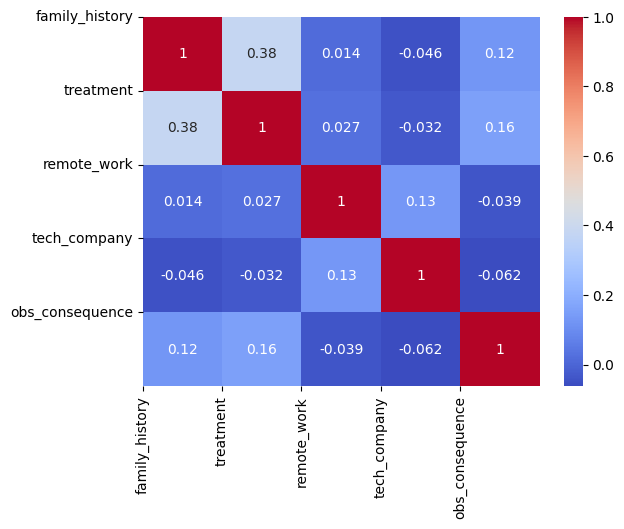

In [6]:
# Crear un mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# Configurar las etiquetas de los ejes
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)

# Mostrar el mapa de calor
plt.show()

## Preparación dataframe

In [8]:
#crearse dataset igual para modificarlo
datos_tech = datos_tech_original.copy()


In [9]:
#eliminar datos duplicados 
duplicados = datos_tech.duplicated().any()
print(duplicados)
print(len(datos_tech_original))

#eliminar duplicados si los tiene
datos_student = datos_tech.drop_duplicates()
print(len(datos_tech))

False
1259
1259


In [13]:
#comprobar en qué columnas hay valores nulos
columnas_nulos = datos_tech.isnull()
#contar de valores nulos en cada columna
cantidad_faltantes_por_columna = columnas_nulos.sum()
columnas_nulos = columnas_nulos[columnas_nulos].index.tolist()
print(columnas_nulos)
print(cantidad_faltantes_por_columna)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [14]:
columnas_na = datos_tech.isna().any()
columnas_na = columnas_na[columnas_na].index.tolist()
print(columnas_nulos)

ValueError: Must specify a fill 'value' or 'method'.

In [9]:
#añadir id a cada usuario
datos_tech['id_user'] = range(1, len(datos_tech) + 1)

In [ ]:
#limpiar columna gender
contar_generos= datos_tech_original['Gender'].value_counts()
print(len(datos_tech_original['Gender'].unique()))
print((datos_tech_original['Gender'].unique()))
contar_generos= datos_tech_original['Gender'].value_counts()

In [10]:

#convertir toda la columna de Genero a minuscula para agrupar 
datos_tech["Gender"]= datos_tech["Gender"].str.lower()
contar_generos= datos_tech['Gender'].value_counts()
contar_generos = contar_generos.to_frame()

#funcion para agrupar la columna genero en tres valores (masculino, femeninino y otro)
def asignar_grupo(nombre):
    if nombre in ['male', 'm', 'make','male ', 'msle', 'man']:
        return 'masculino'
    elif nombre in ['female', 'f','woman', 'female ']:
        return 'femenino'
    else:
        return 'otro'

#aplicar la funcion en dataset de contar para comprobar y en el dataset completo
contar_generos.reset_index(level='Gender', inplace=True)
contar_generos['genero'] = contar_generos['Gender'].apply(asignar_grupo)
datos_tech['genero'] = datos_tech['Gender'].apply(asignar_grupo)
contar_generos= datos_tech['genero'].value_counts()

In [11]:
#¿como trato a los trangeneros? 
#los puedo agrupar o dejar en otro, ya que puede condicionar

In [12]:
#limpiar edades que sean menor que 18 y mayor de 100, quedarse solo las edades que cumplan 18<edad<100
#nombre columna "Age"
datos_tech = datos_tech.loc[(datos_tech['Age'] >= 18) & (datos_tech['Age'] <= 100)]
len(datos_tech)



1251

In [21]:
#crear dataframre final procesado para subir
datos_tech_procesados = datos_tech.copy()



## Preparación Dataset students

In [13]:
#crearse dataset igual para modificarlo
datos_student = datos_student_original.copy()


In [14]:
#eliminar datos duplicados 
duplicados = datos_student.duplicated().any()
print(duplicados)
print(len(datos_student_original))

#eliminar duplicados si los tiene
datos_student = datos_student.drop_duplicates()
print(len(datos_student))


False
101
101


In [15]:
#renombrar columnas dataframe (sobretodo en el de estudiantes, que son preguntas, poner nombres identificativos)
nuevos_nombres = {'A': 'Columna1', 'B': 'Columna2'}
datos_tech = datos_tech.rename(columns=nuevos_nombres)

# Mostrar el DataFrame con las columnas renombradas
print(df)

NameError: name 'df' is not defined

## Exportar datos procesados a csv

In [ ]:
#exportar dataframes procesados en csv
#contar_generos.to_csv("D:/t738623/Documents/TFG-main/TFG-main/Procesados/contar_generos.csv")
datos_tech.to_csv("D:/t738623/Documents/TFG-main/TFG-main/Procesados/datos_tech.csv")
#datos_student.to_csv("/Users/luciaprietogonzalez/Documents/Universidad/CURSO4/TFG/TFG DEFINITIVO/DESARROLLO/DATASETS/c/datos_student.csv", index = False)



## Subir Tablas a BigQuery y crear vistas

[Cargar datos desde Dataframe a Biguery](https://cloud.google.com/bigquery/docs/samples/bigquery-load-table-dataframe?hl=es-419)



In [20]:
#CREAR DATASET SI NO EXISTE
#dataset_ref = client.dataset(dataset_id)

#dataset = bigquery.Dataset(dataset_ref)
#dataset.location = 'europe-west1'
#dataset = client.create_dataset(dataset)

In [22]:
#FUNCION PARA SUBIR DATAFRAME A BIGQUERY
def cargar_dataframe_bigquery (dataframe, dataset_id, table_name, table_id):
    client = bigquery.Client(project=id_proyecto)

    #verificar si la tabla ya existe 
    table_ref = client.dataset(dataset_id).table(table_name)
    table = client.get_table(table_ref)

    #venirificar si el esquema de la tabla ha cambiado
    if set(dataframe.columns) != set([field.name for field in table.schema]):
        #si ha cambiado el esquema elimina la tabla
        print("Si ha cambiado el esquema")
        client.delete_table(table_ref)
        print("Se ha borrado correctamente")
    else: print("No ha cambiado")

    #subir dataframe a la tabla
    job_config = bigquery.LoadJobConfig()
    job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
    job = client.load_table_from_dataframe(dataframe, table_id, job_config=job_config)
    job.result()  

    print(f"Se ha cargado la tabla {table_id} correctamente")

In [23]:
#QUITARLE UNA COLUMNA A DATAFRAME PARA PROBAR SI FUNCIONA LA FUNCION
#datos_tech_procesados = datos_tech.drop(['comments'], axis= 1)

In [24]:
#COMPLETAR CON LOS DATOS DEL DATAFRAME Y LA TABLA 
#dataframe a subir
dataframe = datos_tech_procesados
#nombre dataset bigquery
dataset_id = "DatosTech"
#nombre tabla
table_name =  "datos_tech_procesados"
#nombre dataset mas tabla
table_id = "DatosTech.datos_tech_procesados"

#aplicar funcion
cargar_dataframe_bigquery (dataframe, dataset_id, table_name, table_id)


No ha cambiado
Se ha cargado la tabla DatosTech.datos_tech_procesados correctamente


In [16]:
#CREAR VISTA A PARTIR DE LA TABLA 

def crear_vista(id_proyecto, dataset, tabla, vista):
    client = bigquery.Client(project=id_proyecto)

    #consulta para crear la vista
    query = f"""
    CREATE OR REPLACE VIEW `{id_proyecto}.{dataset}.{vista}`
    AS
    SELECT *
    FROM `{id_proyecto}.{dataset}.{tabla}`
    """

    #ejecutar la consulta
    job = client.query(query)
    job.result() 

    print(f"{vista} creada correctamente")




In [17]:
#COMPLETAR CON LOS DATOS DE LA VISTA
#id proyecto
id_proyecto = 'tfg-ayudasaludmental-12345'
#nombre dataset bigquery
dataset = "DatosTech"
#nombre tabla
tabla =  "datos_tech_procesados"
#nombre vista
vista = "V_DATOS_PROCESADOS"


crear_vista(id_proyecto, dataset, tabla, vista)

V_DATOS_PROCESADOS creada correctamente
